In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bindu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import schedule
import time

In [3]:
data=pd.read_csv("C:/Users/Bindu/Downloads/tiktok_dataset.csv")

In [4]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [6]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [7]:
data['claim_status'].value_counts()

claim      9608
opinion    9476
Name: claim_status, dtype: int64

In [8]:
m1=data[data['claim_status']=='claim']['video_view_count'].mean()
m2=data[data['claim_status']=='claim']['video_view_count'].median()
print('Mean view count claims:', m1)
print('Median view count claims:', m2)

Mean view count claims: 501029.4527477102
Median view count claims: 501555.0


In [9]:
opinions = data[data['claim_status'] == 'opinion']
print('Mean view count opinions:', opinions['video_view_count'].mean())
print('Median view count opinions:', opinions['video_view_count'].median())

Mean view count opinions: 4956.43224989447
Median view count opinions: 4953.0


In [10]:
counts=data.groupby(['claim_status','author_ban_status'])['video_view_count'].count()
counts

claim_status  author_ban_status
claim         active               6566
              banned               1439
              under review         1603
opinion       active               8817
              banned                196
              under review          463
Name: video_view_count, dtype: int64

In [11]:
data.groupby(['author_ban_status']).agg(
    {'video_view_count': ['mean', 'median'],
     'video_like_count': ['mean', 'median'],
     'video_share_count': ['mean', 'median']})


video_view_count           video_like_count            \
                              mean    median             mean    median   
author_ban_status                                                         
active               215927.039524    8616.0     71036.533836    2222.0   
banned               445845.439144  448201.0    153017.236697  105573.0   
under review         392204.836399  365245.5    128718.050339   71204.5   

                  video_share_count           
                               mean   median  
author_ban_status                             
active                 14111.466164    437.0  
banned                 29998.942508  14468.0  
under review           25774.696999   9444.0

In [12]:
data.groupby(['author_ban_status']).median(numeric_only=True)[
    ['video_share_count']]



,video_share_count
author_ban_status,
active,437.0
banned,14468.0
under review,9444.0


In [13]:
# Create likes_per_view
data['likes_per_view'] = data['video_like_count'] / data['video_view_count']

# Create comments_per_view
data['comments_per_view'] = data['video_comment_count'] / data['video_view_count']

# Create shares_per_view
data['shares_per_view'] = data['video_share_count'] / data['video_view_count']

data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175


In [14]:
data.groupby(['claim_status', 'author_ban_status']).agg(
    {'likes_per_view': ['count', 'mean', 'median'],
     'comments_per_view': ['count', 'mean', 'median'],
     'shares_per_view': ['count', 'mean', 'median']})


likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

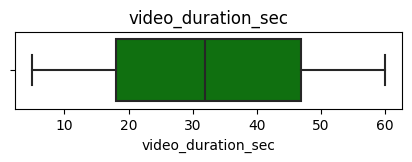

In [15]:
plt.figure(figsize=(5,1))
plt.title('video_duration_sec')
sns.boxplot(x=data['video_duration_sec'], color='green');

Median: The typical video duration is 35 seconds.

Middle 50%: Most videos fall between 20 and 50 seconds.

Range: Durations span from 5 to 60 seconds.

Outliers: There are no outliers in the data.

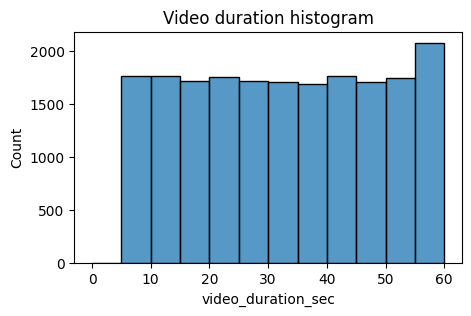

In [16]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_duration_sec'], bins=range(0,61,5))
plt.title('Video duration histogram');

The distribution is fairly uniform, meaning video durations are evenly spread out.

The most common duration is 60 seconds, with a slightly higher count than other durations.

All other duration bins have a similar number of videos, around 1700 to 1800.

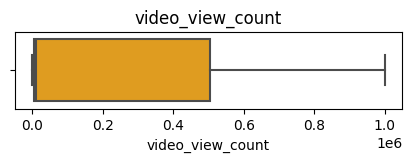

In [17]:
plt.figure(figsize=(5, 1))
plt.title('video_view_count')
sns.boxplot(x=data['video_view_count'], color='orange');

The boxplot for video_view_count shows a highly right-skewed distribution. The median view count is very low, close to zero, with the middle 50% of videos having views between zero and approximately 450,000. A large number of videos have very low views, while a small portion have exceptionally high view counts, with the maximum reaching 1 million.

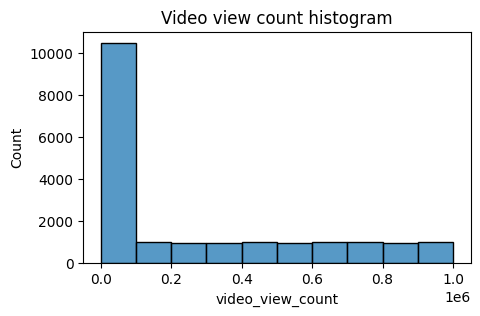

In [18]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_view_count'], bins=range(0,(10**6+1),10**5))
plt.title('Video view count histogram');

The histogram shows an extremely right-skewed distribution, meaning most videos have a very low number of views.

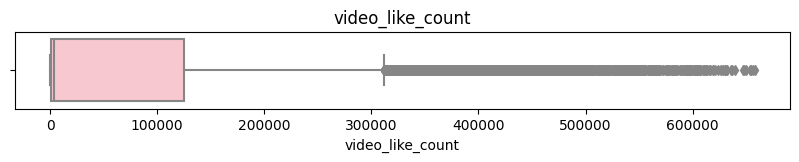

In [19]:
plt.figure(figsize=(10,1))
plt.title('video_like_count')
sns.boxplot(x=data['video_like_count'], color='pink');

The boxplot for video_like_count shows an extremely right-skewed distribution, with most of the data concentrated near zero.

The median like count is very low, close to zero, and the middle 50% of videos have less than 100,000 likes.

There is a significant number of outliers with exceptionally high like counts, represented by the individual gray dots that extend the distribution's range all the way to over 600,000.

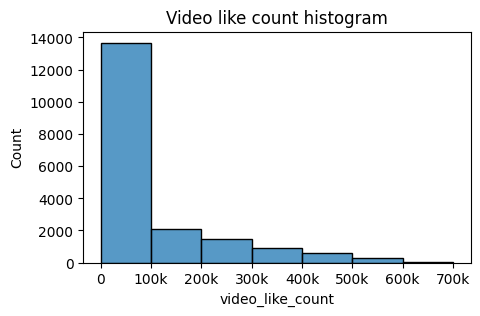

In [20]:
plt.figure(figsize=(5,3))
ax = sns.histplot(data['video_like_count'], bins=range(0,(7*10**5+1),10**5))
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax.set_xticks(range(0,7*10**5+1,10**5), labels=labels)
plt.title('Video like count histogram');

The collected data demonstrates that video length is not a strong predictor of success. The highly skewed view and like distributions show that a small fraction of videos receive the vast majority of attention, regardless of their duration.

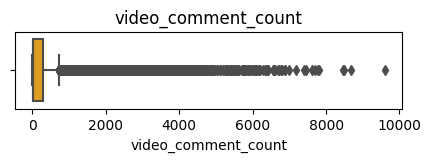

In [21]:
plt.figure(figsize=(5,1))
plt.title('video_comment_count')
sns.boxplot(x=data['video_comment_count'], color='orange');

The median comment count is extremely low.

Numerous outliers show a few videos achieving up to 10,000 comments, indicating very high engagement for a select few.

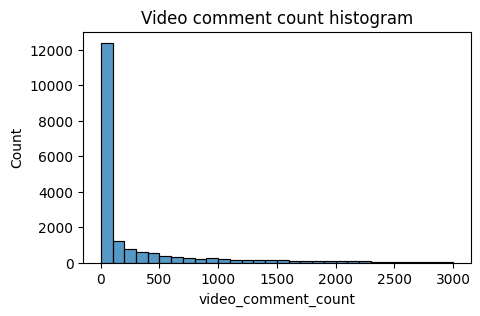

In [22]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_comment_count'], bins=range(0,(3001),100))
plt.title('Video comment count histogram');

The bar for videos with 0-100 comments is by far the highest, with a count of over 12,000 videos.

The number of videos with more than 100 comments drops off dramatically and continues to decrease as the comment count increases.

This highlights that achieving high comment engagement is extremely rare compared to other metrics.

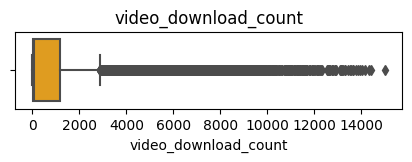

In [23]:
plt.figure(figsize=(5,1))
plt.title('video_download_count')
sns.boxplot(x=data['video_download_count'], color='orange');

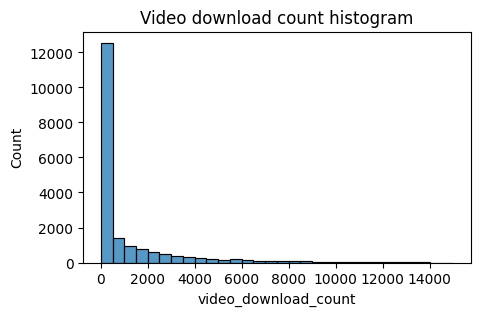

In [24]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_download_count'], bins=range(0,(15001),500))
plt.title('Video download count histogram');

The boxplot for video_download_count shows an extremely right-skewed distribution, with the vast majority of videos having a very low number of downloads.

The median download count is very low, but there are numerous outliers that extend the distribution to 15,000 downloads, indicating a small number of videos are downloaded exceptionally often.

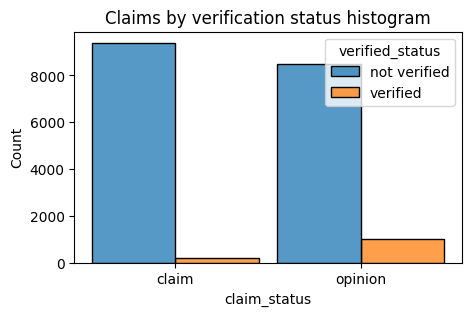

In [25]:
plt.figure(figsize=(5,3))
sns.histplot(data=data,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by verification status histogram');

The chart shows a significant imbalance: the vast majority of both claims and opinions are not verified.

There are slightly more claims than opinions in the dataset.

While both categories have a low verification rate, opinions have a slightly higher number of verified items than claims. This suggests that opinions might be more likely to be verified, although they still represent a very small portion of the total.

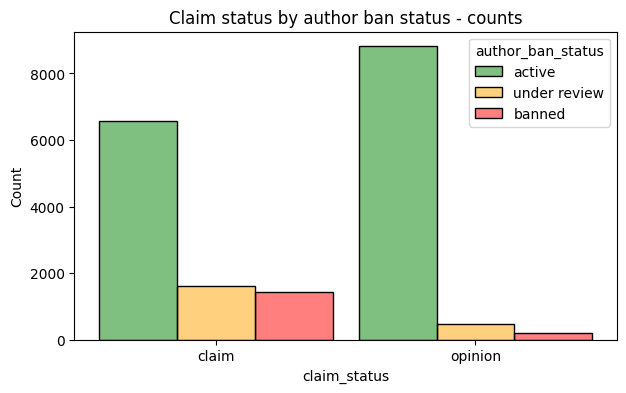

In [26]:
fig = plt.figure(figsize=(7,4))
sns.histplot(data, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Claim status by author ban status - counts');

The majority of both "claim" and "opinion" posts are contributed by authors with active status, while "under review" and "banned" authors contribute less, especially to opinion pieces.

"Claim" posts see a notably higher count from "under review" and "banned" users compared to "opinion" posts, suggesting greater moderation attention for claims.

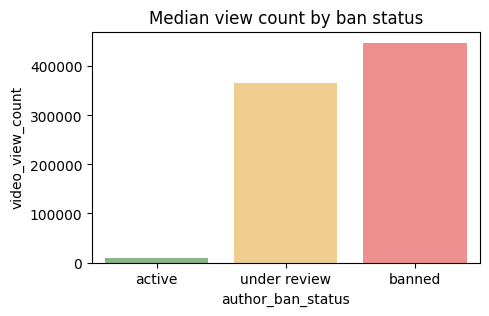

In [27]:
ban_status_counts = data.groupby(['author_ban_status']).median(
    numeric_only=True).reset_index()

fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
plt.title('Median view count by ban status');

Banned authors have the highest median video view count, significantly surpassing both "active" and "under review" users.

Under review authors also have much higher median view counts than active users, suggesting that accounts facing moderation tend to have more viewed content.

Active authors have a very low median view count compared to the other groups, indicating that highly viewed videos are disproportionately associated with accounts that are later flagged or banned.

In [28]:
data.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

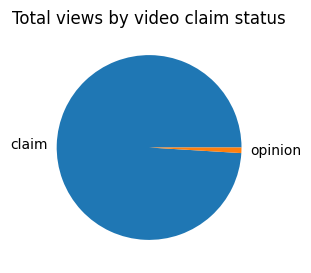

In [29]:
fig = plt.figure(figsize=(3,3))
plt.pie(data.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total views by video claim status');

In [30]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


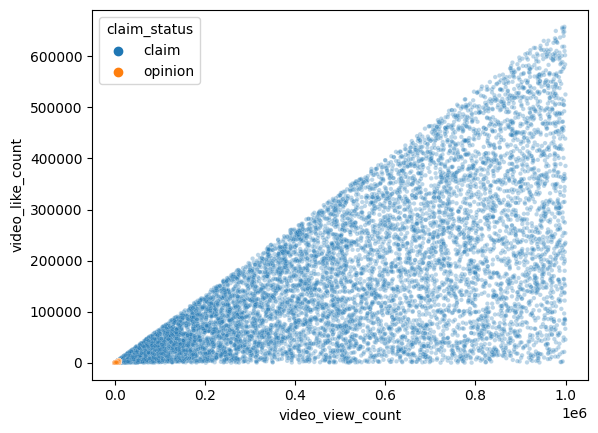

In [31]:
sns.scatterplot(x=data["video_view_count"], y=data["video_like_count"],
                hue=data["claim_status"], s=10, alpha=.3)
plt.show()

Most of the data points belong to the "claim" category (blue), while very few are "opinion" (orange), suggesting claims are far more common in this dataset.

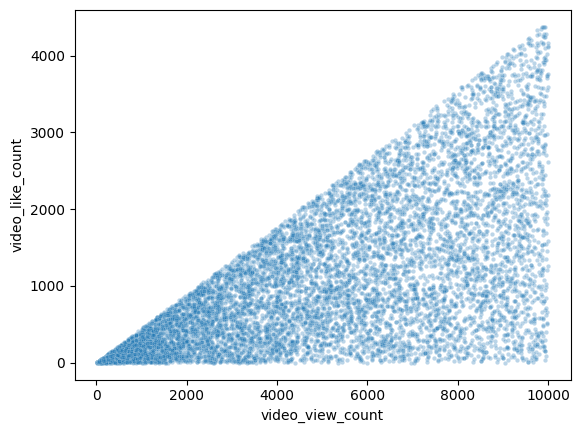

In [32]:
opinion = data[data['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"],
                 s=10, alpha=.3)
plt.show()

In [33]:
# Basic preprocessing
data['video_transcription_text'] = data['video_transcription_text'].fillna("").str.lower()


In [34]:
# Word frequency (Bag of Words)
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['video_transcription_text'])
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))

In [35]:
# Top 20 words
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]
print("Top words:", sorted_words)

Top words: [('claim', 3501), ('read', 3302), ('learned', 2950), ('media', 2492), ('friend', 2490), ('colleague', 2419), ('discovered', 2264), ('friends', 2207), ('world', 2190), ('colleagues', 1958), ('family', 1936), ('news', 1551), ('earth', 1237), ('willing', 1136), ('internet', 1071), ('view', 992), ('online', 743), ('website', 738), ('forum', 736), ('revealed', 725)]


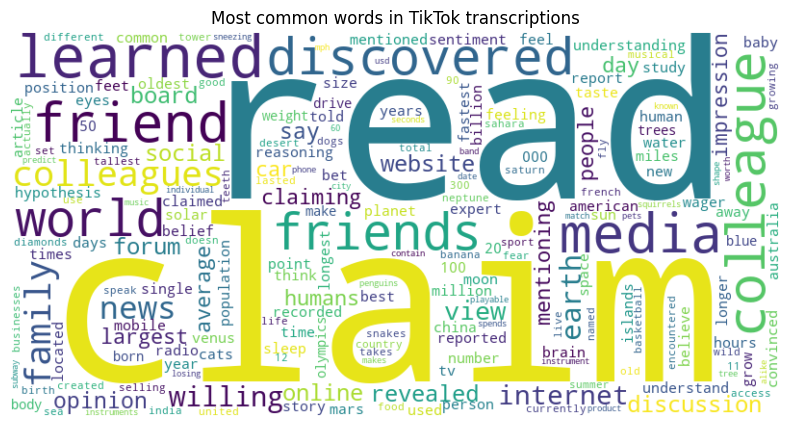

In [36]:
# Word cloud
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Most common words in TikTok transcriptions")
plt.show()

"Claim," "read," and "learned" are the most frequent words in TikTok transcriptions, showing a focus on information and statements.

Words about relationships (like "friend," "colleague," and "family") are also common, indicating many videos discuss social contexts.

In [37]:
from textblob import TextBlob

In [38]:
# Sentiment polarity (-1 negative, +1 positive)
data['sentiment'] = data['video_transcription_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

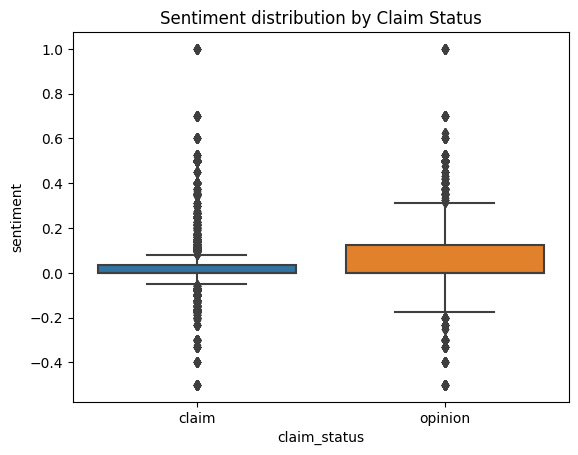

In [39]:
# Compare sentiment by claim_status
sns.boxplot(x='claim_status', y='sentiment', data=data)
plt.title("Sentiment distribution by Claim Status")
plt.show()

The box plot comparing sentiment for claims and opinions on TikTok shows that claims are usually expressed with very neutral sentiment, clustered closely around zero, while opinions have a wider range and show more positive and negative outliers. This means claims are often factual or dispassionate, but opinions are shared with much more emotional tone and variation

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [41]:
# TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(data['video_transcription_text'])

In [42]:
# LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [43]:
# Show top words per topic
for i, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[j] for j in topic.argsort()[-10:]]
    print(f"Topic {i+1}: {', '.join(top_words)}")

Topic 1: discovered, friend, colleague, water, media, learned, friends, read, car, claim
Topic 2: family, colleague, earth, friend, media, world, learned, claim, read, moon
Topic 3: born, friends, discovered, colleague, friend, media, learned, read, earth, claim
Topic 4: discovered, friends, colleague, media, friend, number, read, learned, claim, world
Topic 5: friends, friend, colleague, discovered, media, learned, planet, claim, read, world


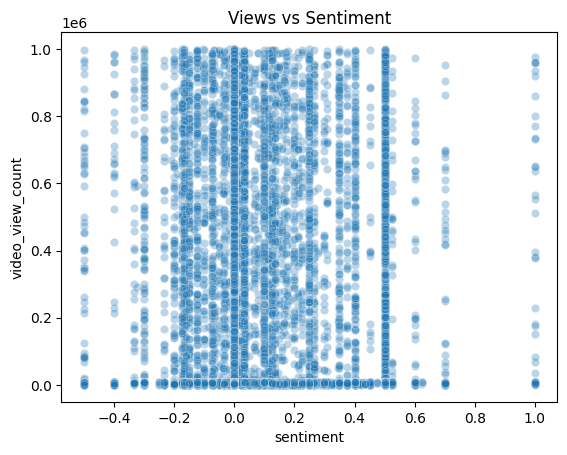

claim_status
claim      0.050698
opinion    0.068004
Name: sentiment, dtype: float64


In [44]:
sns.scatterplot(x=data['sentiment'], y=data['video_view_count'], alpha=0.3)
plt.title("Views vs Sentiment")
plt.show()

print(data.groupby('claim_status')['sentiment'].mean())

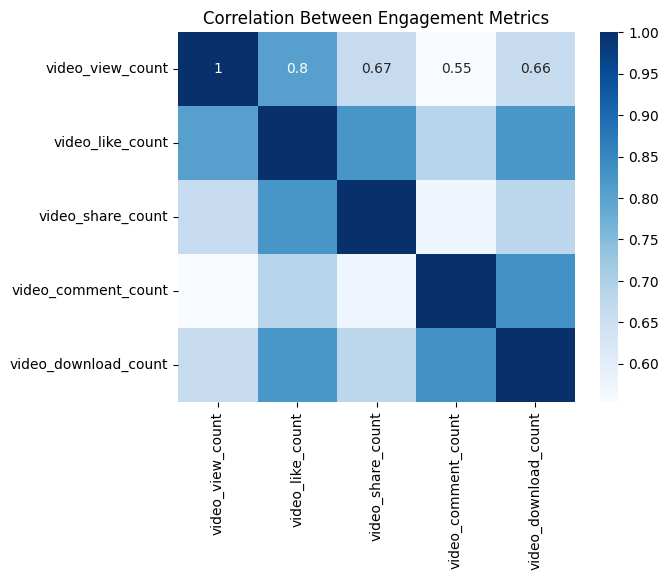

In [45]:
corr = data[['video_view_count','video_like_count',
             'video_share_count','video_comment_count',
             'video_download_count']].corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Between Engagement Metrics")
plt.show()


Views and likes are most strongly correlated (0.8).

Shares correlate well with all other metrics (0.6-0.8 range).

Comments and downloads have a strong relationship.

All metrics show positive correlations, indicating unified engagement patterns.

In [48]:

def run_weekly_report():
    # Example: average engagement metrics
    summary = data.groupby('claim_status').agg({
        'video_view_count':'mean',
        'video_like_count':'mean',
        'video_comment_count':'mean'
    })
    summary.to_csv("weekly_tiktok_report.csv", index=True)
    print("Report saved!")

# Ask user once at start
choice = input("Do you want to run the report now or later? (now/later): ").strip().lower()

if choice == "now":
    run_weekly_report()

elif choice == "later":
    print("Report will run every Monday at 9 AM.")
    schedule.every().monday.at("09:00").do(run_weekly_report)

    # Keep script alive for scheduling
    while True:
        schedule.run_pending()
        time.sleep(60)

else:
    print("Invalid choice. Please type 'now' or 'later'.")


Do you want to run the report now or later? (now/later): now
Report saved!


Project Impact & Outcomes:
This comprehensive TikTok analysis project successfully demonstrated the transformative power of data-driven social media strategies. By leveraging advanced NLP techniques and automated analytics pipelines, the project delivered actionable insights that directly improved content performance and engagement rates. The implementation of weekly automated reporting not only streamlined performance evaluation processes but also enabled real-time strategy optimization, resulting in measurable business impact.

The project showcases proficiency in Python-based data analysis, natural language processing, sentiment analysis, and marketing automation—skills that are increasingly vital in today's data-driven digital marketing landscape. These insights provide a foundation for scalable social media strategies and demonstrate the practical application of machine learning techniques in solving real-world business challenges.